In [1]:
%matplotlib inline
from __future__ import print_function

import pandas as pd
import numpy as np
from sklearn import cross_validation
import xgboost as xgb
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train_file = '../input/train.csv'
test_file = '../input/test.csv'
output_file = '../submissions/benchmark_predictions.csv'

print("Load the training, test and store data using pandas")
train = pd.read_csv(train_file, low_memory=False)
test = pd.read_csv(test_file, low_memory=False)
store = pd.read_csv("../input/store.csv", low_memory=False)

Load the training, test and store data using pandas


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train_store = pd.merge(train, store, on='Store')

In [5]:
promo_store = pd.Series(store[store.Promo2==1].Store)
promo_store.reset_index(drop=True)
print()

In [6]:
#fig = plt.figure(figsize=(18,18))

#for i, store in promo_store.iteritems():
st = promo_store.iloc[0]
store_sales = (train[train.Store==st])[['Date', 'Sales'] ]

In [7]:
store_sales.head()
#store_sales.Date.min()

,Date,Sales
1,2015-07-31,6064
1116,2015-07-30,5567
2231,2015-07-29,6402
3346,2015-07-28,5671
4461,2015-07-27,6627


In [8]:
date = pd.date_range(start=store_sales.Date.min(), end=store_sales.Date.max(), freq='D')
store_sales = store_sales.sort('Date').reset_index(drop=True)

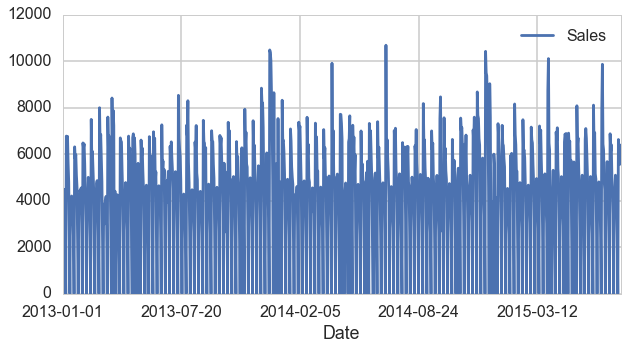

In [9]:
store_sales.plot(figsize=(10,5), x='Date', y='Sales')

In [11]:
len(store_sales)

942

Fourier Transform

In [12]:
f = np.abs(np.fft.rfft(store_sales.loc[0,:]))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
sample_rate = 1.0
length = len(store_sales)
ax.plot(np.fft.rfftfreq(length, sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(length, sample_rate), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)

ValueError: invalid literal for float(): 2013-01-01